## Interpolations

In [65]:
using Interpolations
using Test

### Unstructured 2D grid interpoation

In [66]:
num_points_x = 7
num_points_y = 5

xpoints = [x^2 for x in 1:num_points_x] .+ collect(1:num_points_x)
ypoints = sort!([.2y*rand() for y in 1:num_points_y])

f(x,y) = 2*x*y
f_points = [f(x,y) for x in xpoints, y in ypoints]

nodes = (xpoints, ypoints)

axis_interpolation_x = Gridded(Linear())
axis_interpolation_y = Gridded(Linear())


itp = interpolate(nodes, f_points, (axis_interpolation_x, axis_interpolation_y))

# Point to interpolate
x_interpolated = (maximum(xpoints)/2, maximum(ypoints)/2)

@show itp(x_interpolated...)
@show f(x_interpolated...)

itp(x_interpolated...) = 17.21860652967939
f(x_interpolated...) = 17.21860652967939


17.21860652967939

In [97]:
# Function to be interpolated
f(x,y) = 2*x*y
# Points where the info is given
points = [(0.,0.), (.25,.5), (.75,0.9), (1.,0.25)]
xpoints = getindex.(points,1)
ypoints = getindex.(points,2)
# field at each point
f_measured = [f(p...) for p in points]
# poit to interpolate
point_to_interpolate = (.5,.4) 


# I would like to interpolate for instance for a point inside the point cloud
itp = interpolate((xpoints, ypoints), f_matrix, (axis_interpolation_x, axis_interpolation_y))


DimensionMismatch: DimensionMismatch: knot vectors must have the same axes as the corresponding dimension of the array

## Visualize the data

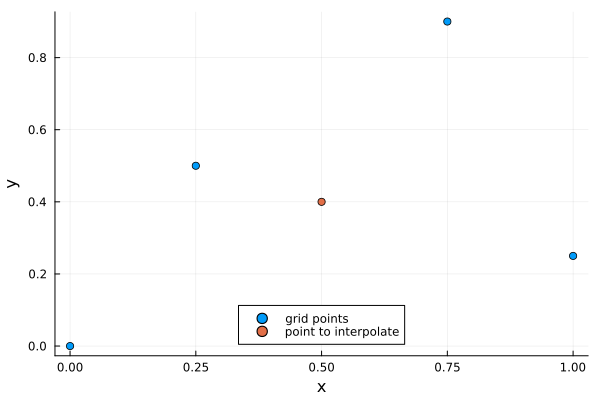

In [106]:
scatter(points, label="grid points")
scatter!(point_to_interpolate, label="point to interpolate")
xlabel!("x")
ylabel!("y")
plot!(legend=:bottom)

## Plot the error

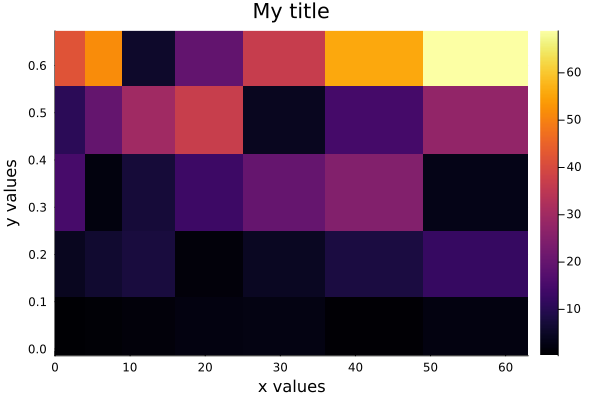

In [69]:
using Plots


gr()
data = rand(21,100)
heatmap(xpoints,
    ypoints,
    f_points,
    xlabel="x values", ylabel="y values",
    title="My title")
